# Базовые структуры данных

### 1. Массив

Массив — это структура данных, состоящая из элементов, каждый из которых идентифицируется с использованием индекса или ключа. Элементы массива хранятся в последовательной памяти, что обеспечивает быстрый доступ по индексу.

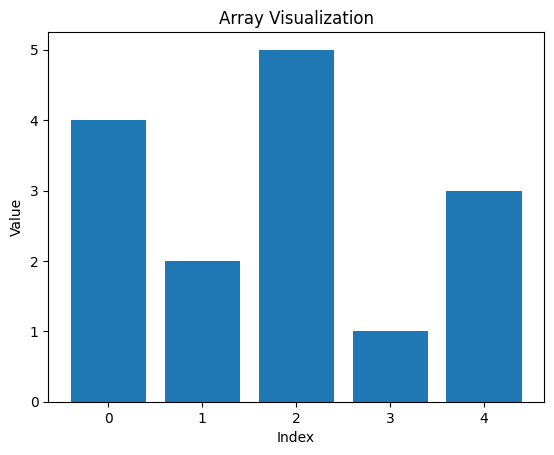

In [1]:
import matplotlib.pyplot as plt

def visualize_array(arr):
    fig, ax = plt.subplots()
    bar_plot = plt.bar(range(len(arr)), arr)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Array Visualization')
    plt.show()

# Пример массива
array = [4, 2, 5, 1, 3]
visualize_array(array)

### 2. Связный список / Двусвязный список

Связный список — это структура данных, в которой каждый элемент называется "узлом" и содержит данные и ссылку на следующий узел. 
Двусвязный список имеет ссылки не только на следующий узел, но и на предыдущий.

**Визуализация:** Связный список можно визуализировать в виде цепочки кругов (узлов), соединённых стрелками.

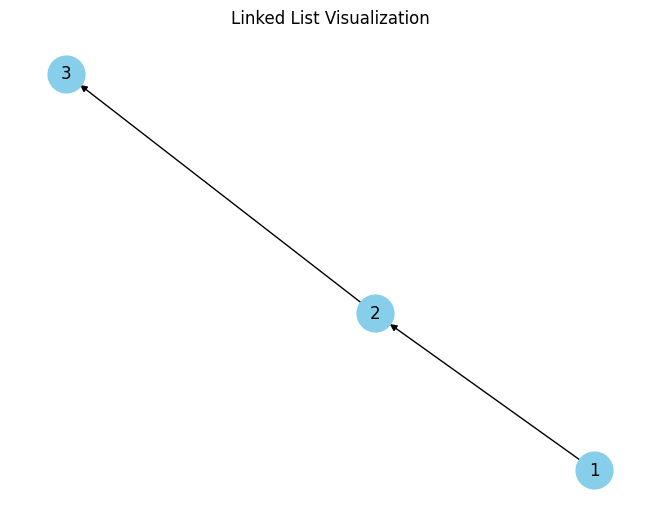

In [2]:
import networkx as nx

class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def visualize_linked_list(head):
    G = nx.DiGraph()
    current = head
    while current:
        if current.next:
            G.add_edge(current.value, current.next.value)
        else:
            G.add_node(current.value)
        current = current.next
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue")
    plt.title('Linked List Visualization')
    plt.show()

# Пример связного списка
node3 = ListNode(3)
node2 = ListNode(2, node3)
node1 = ListNode(1, node2)

visualize_linked_list(node1)

### 3. Деревья

Дерево — это древовидная структура данных, состоящая из узлов, где каждый узел имеет одно родительское связующее и несколько дочерних. Самый верхний узел называется корнем.

**Визуализация:** Дерево можно представить в виде диаграммы узлов, объединенных ветвями.

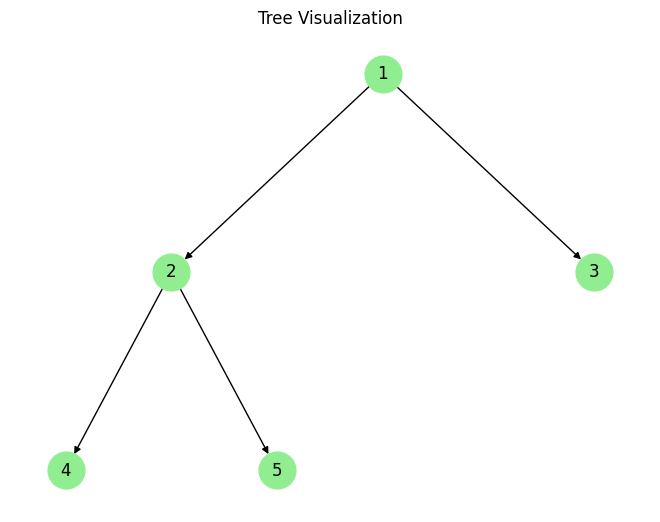

In [3]:
class TreeNode:
    def __init__(self, value=0, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

def visualize_tree(node, pos=None, level=0, dx=1.0):
    if pos is None:
        pos = {node.value: (0, 0)}
    if node.left:
        pos[node.left.value] = (pos[node.value][0] - dx / (2**level), -level-1)
        visualize_tree(node.left, pos, level + 1, dx)
    if node.right:
        pos[node.right.value] = (pos[node.value][0] + dx / (2**level), -level-1)
        visualize_tree(node.right, pos, level + 1, dx)
    return pos

def plot_tree(tree):
    G = nx.DiGraph()
    nodes = [(tree.value)]
    edges = []
    to_visit = [tree]
    while to_visit:
        node = to_visit.pop()
        if node.left:
            to_visit.append(node.left)
            nodes.append(node.left.value)
            edges.append((node.value, node.left.value))
        if node.right:
            to_visit.append(node.right)
            nodes.append(node.right.value)
            edges.append((node.value, node.right.value))
    G.add_edges_from(edges)
    pos = visualize_tree(tree)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightgreen")
    plt.title('Tree Visualization')
    plt.show()

# Пример дерева
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)

plot_tree(root)

### 4. Хэш-таблица

Хэш-таблица — это структура данных, которая реализует ассоциативный массив, т.е. структуру, которая может отображать ключи на значения.

**Визуализация:** Таблица, где ключи сопоставлены с определенными "ячейками" памяти с помощью хэш-функции.

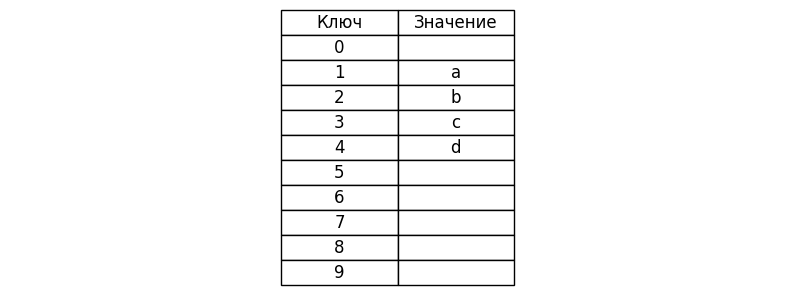

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def visualize_hash_table(keys, values, table_size):
    # Создаем пустую таблицу
    hash_table = [None] * table_size
    
    # Заполняем хэш-таблицу
    for key, value in zip(keys, values):
        hash_index = key % table_size
        hash_table[hash_index] = value
    
    # Преобразуем хэш-таблицу в DataFrame
    df = pd.DataFrame({
        'Hash Index': range(table_size),
        'Values': hash_table
    })
    
    # Визуализируем хэш-таблицу
    fig, ax = plt.subplots(figsize=(10, 2))
    
    # Создаем таблицу
    table_data = [['Ключ', 'Значение']]
    for idx, val in enumerate(hash_table):
        table_data.append([idx, val if val is not None else ''])
    
    table = ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center', colWidths=[0.1]*3)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)
    
    ax.axis('off')
    plt.show()

# Пример хэш-таблицы
keys = [1, 2, 3, 4]
values = ['a', 'b', 'c', 'd']
table_size = 10
visualize_hash_table(keys, values, table_size)

### 5. Бинарная куча

Бинарная куча — это двоичное дерево, которое удовлетворяет свойству кучи. В мин-куче каждый узел меньше или равен своим дочерним узлам, а в макс-куче каждый узел больше или равен своим дочерним узлам.

**Визуализация:** Похоже на дерево, но с восходящими или нисходящими значениями на уровнях.

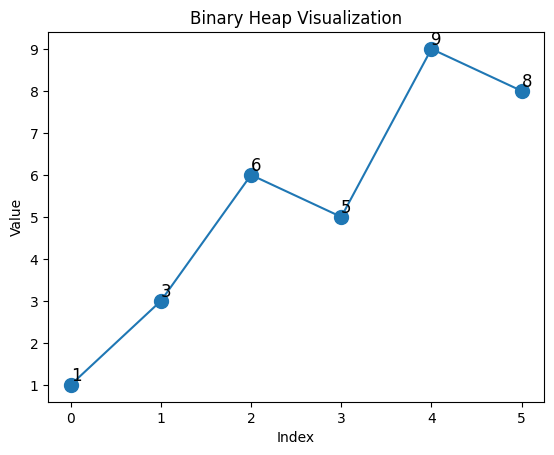

In [5]:
def visualize_binary_heap(heap):
    fig, ax = plt.subplots()
    ax.plot(heap, 'o-', markersize=10)
    for i, value in enumerate(heap):
        plt.text(i, value, f'{value}', verticalalignment='bottom', fontsize=12)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Binary Heap Visualization')
    plt.show()

# Пример бинарной кучи (мин-куча)
binary_heap = [1, 3, 6, 5, 9, 8]
visualize_binary_heap(binary_heap)

### 6. Очередь / Стэк / Двусторонняя очередь

- **Очередь:** Структура данных "первым пришел — первым вышел" (FIFO).
- **Стэк:** Структура данных "последним пришел — первым вышел" (LIFO).
- **Двусторонняя очередь:** Модифицированная очередь, позволяющая добавление и удаление элементов с обоих концов.

**Визуализация:** Ряд прямоугольников с указанием направления добавления и удаления элементов.

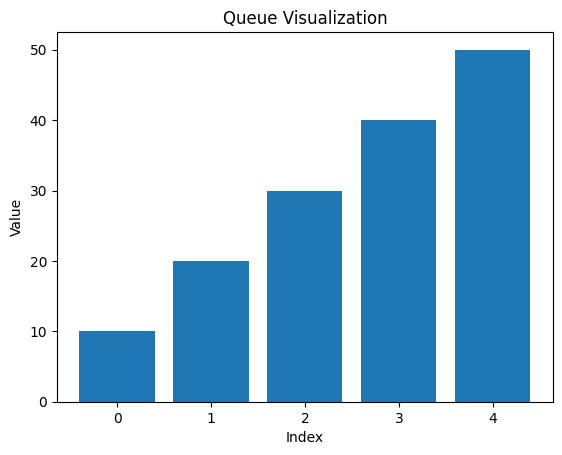

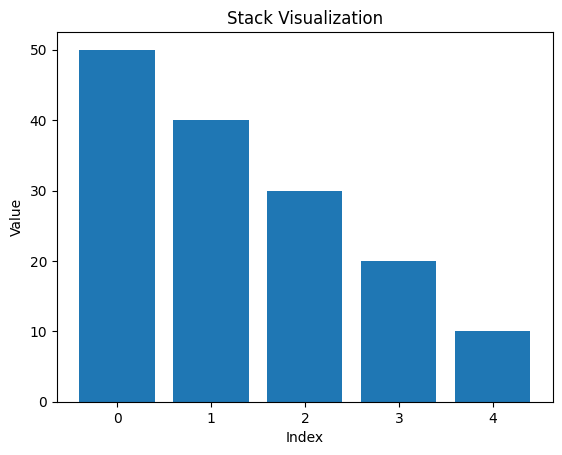

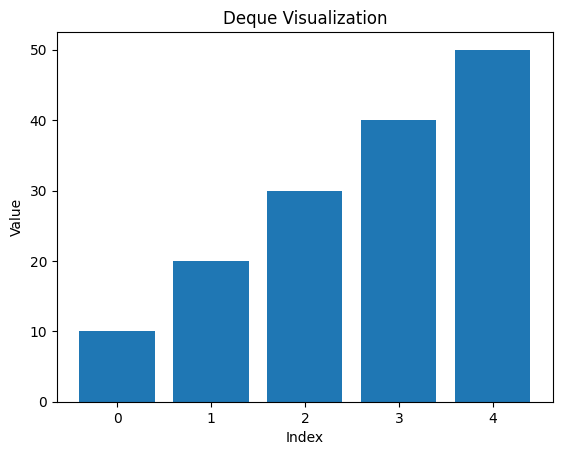

In [6]:
def visualize_queue(queue):
    fig, ax = plt.subplots()
    bar_plot = plt.bar(range(len(queue)), queue)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Queue Visualization')
    plt.show()

# Пример очереди (FIFO)
queue = [10, 20, 30, 40, 50]
visualize_queue(queue)

# Стэк
def visualize_stack(stack):
    fig, ax = plt.subplots()
    bar_plot = plt.bar(range(len(stack)), stack[::-1])
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Stack Visualization')
    plt.show()

# Пример стэка (LIFO)
stack = [10, 20, 30, 40, 50]
visualize_stack(stack)

# Двусторонняя очередь
from collections import deque

def visualize_deque(deque_obj):
    fig, ax = plt.subplots()
    x = range(len(deque_obj))
    y = list(deque_obj)
    bar_plot = plt.bar(x, y)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Deque Visualization')
    plt.show()

# Пример двусторонней очереди
deque_obj = deque([10, 20, 30, 40, 50])
visualize_deque(deque_obj)

### 7. Граф

Граф — это набор узлов (вершин), соединенных ребрами. Графы могут быть ориентированными или неориентированными.

**Визуализация:** Узлы (кружки) соединяются линиями (ребрами).

Давай сразу напишем примерный код для каждой структуры данных на Python с помощью различных библиотек для визуализации (например, Matplotlib, NetworkX и др.). Вот начало для некоторых из них:

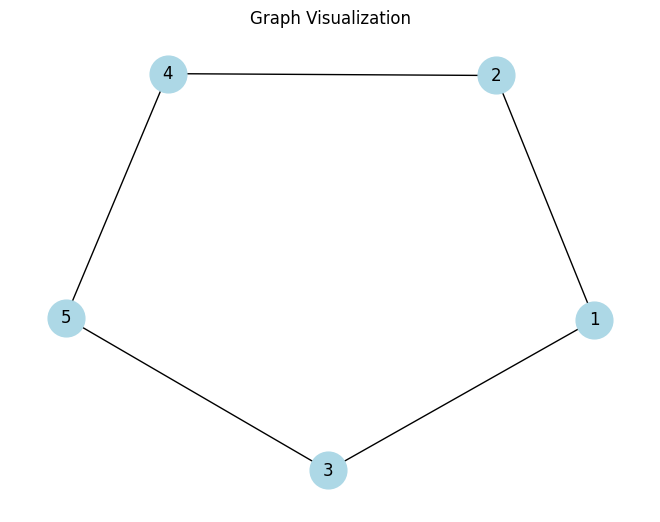

In [7]:
def visualize_graph(edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue")
    plt.title('Graph Visualization')
    plt.show()

# Пример графа
edges = [(1, 2), (1, 3), (2, 4), (3, 5), (4, 5)]
visualize_graph(edges)